In [294]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [295]:
jobs = ['Data scientist', 'Python', 'Javascript', 'Java','Data scientist', 'Python', 'Javascript', 'Java']
countrys = ['France','France','France','France', 'USA','USA','USA','USA']

# prendres tout les noms de fichiers csv dans le array
filenames = ['data/'+str.lower(job).replace(' ','')+str.lower(country)+'.csv' for job, country in zip(jobs,countrys) ]

dfs = [pd.read_csv(filename, sep=';', encoding="utf-8-sig") for filename in filenames]

# Ajouter une colonne indique le métier
dfs[0]['Métier'] = 'Data Scientist' 
dfs[1]['Métier'] = 'Développeur Python'
dfs[2]['Métier'] = 'Développeur JavaScript'
dfs[3]['Métier'] = 'Développeur Java'
dfs[4]['Métier'] = 'Data Scientist'
dfs[5]['Métier'] = 'Développeur Python'
dfs[6]['Métier'] = 'Développeur JavaScript'
dfs[7]['Métier'] = 'Développeur Java'

# Créer le dataframe à partir de la concaténations de ces fichiers
df = pd.concat(dfs)
df = df[df.Description.isna()==False]

In [296]:
datascientist = df[(df['Poste'].str.lower().str.contains('data')) & (df['Poste'].str.lower().str.contains('scientist')) & (df['Poste'].str.lower().str.contains(str.lower('Machine Learning'))) & (df['Poste'].str.lower().str.contains(str.lower('Data science')))]
df = pd.concat([df[df['Métier'] != 'Data Scientist'], datascientist], ignore_index=True)

In [297]:
# Les mots clés des compétences

skills =  { 'Data science':['data science','Data science'],
            'Data analysis programming language':['Python', 'python'],
            'R': ['"R"', 'langage R','R/' '/R','R studio','RStudio'],
            'Matlab':['MATLAB'],
            'Kubernetes':['Kubernetes'],
            'Fortran':['FORTRAN'],
            'Ruby':['Ruby'] ,
            'Golang':['Golang'],
            'Programming language':['C++', 'C#', 'Bash'],
            'Java':['Java'],
            'JEE':['JEE','J2EE'],
            'JSP':['JSP'],
            'J2ME':['J2ME'],
            'BREW':['BREW'],
            'MVC':['MVC'],
            'SASS':['Sass'],
            'XML':['XML'],
            'Eclipse':['Eclipse'],
            'Spring':['Spring'],
            'Atlassian':['Atlassian'],
            'Jenkin':['Jenkin'],
            'FIX':['Fix'],
            'Nexus':['Nexus'],
            'Maven':['Maven'],
            'Flutter':['Flutter'],
            'Bootstrap':['Bootstrap'],
            'Kafka':['Kafka'],
            'Data software':['Stata', 'PowerBI', 'Gis','EMR', 'RDS', 'S3', 'Athena'],
            'Data analysis':['analyze','analysis','analyzing','analyst','analyser','analytics'],
            'Data preprocessing' :['Clearn', 'Prepare','Preprocessing','gestion de données','Traitement'],
            'Report' :['Report', 'Presentation'],
            'Analytical skills':['analytical skills'],
            'Math':['Math'],
            'Developpement':['Développement','Development'],
            'Integration':['intégration','integration'],
            'React Native':['React Native'],
            'Dataiku':['Dataiku','Data Iku'],
            'Data viz':['Seaborn','Matplotlib','Plotly','visualization','ggplot2','visual','viz'],
            'Data skills':['Numpy', 'Pandas'],
            'Data pipeline':['pipeline'],
            'Data repository': ['Github', 'Git','Gitlab','BitBucket'],
            'SQL': ['SQL','NoSQL','BigQuery','Oracle'],
            'Database':['MongoDB', 'SGBD', 'MySQL', 'MariaDB','Hive', 'HBase', 'BDD','base de donnée','bases de données'],
            'Javascrpit':['Javascript'],
            'POO':['Orientée Objet', 'POO','OOP','Object Oriented','OO','object-oriented','Object Oriented'],
            'Regex':['regex','Design pattern'],
            'Mobile Programming':['Swift','Kotlin', 'Android', 'Androïd','mobile'],
            'Team Work':['team', 'Agile','équipe', 'equipe'],
            'AI': ['Machine-Learning','IA','AI','Machine Learning','Machine learning', 'ML',' Scikit', 'scikit', 'Artificial intelligence', 'Data mining'],
            'Traitement data': ['MapReduce', 'Pig', 'Spark', 'Storm'],
            'Classification':['Classification'],
            'Regression':['Regression'],
            'Reinforcement':['reinforcement', 'traitement automatique'],
            'Clustering':['Clustering'],
            'Web langage':['CSS', 'HTML'],
            'Systems':['Linux', 'GNU', 'Unix', 'Windows'],
            'Scratch':['Scratch'],
            'API':['REST','API','JSon'],
            '.Net':['.Net'],
            'Visual Studio':['Visual Studio'],
            'Web skills': ['Responsive'],
            'Javascript Skills':['Webpack', 'JQuery', 'AJAX','React', 'Angular', 'Vue', 'Node','full stack','npm'],
            'Bureautique':['Excel','Office'],
            'Deep Learning':['Deep Learning','DL','Deep-Learning','Deep-learning', 'Sequential','TensorFlow', 'PyTorch', 'Caffe','Keras','Tensor Flow'],
            'Text analytics':['NLP','Natural Language Processing','Text Analytics', 'Text mining'],
            'Marketing': ['Marketing','Pricing','prix','publicitaires','vente','cible','ciblage'],
            'Finance':['Insurance','Finance','Economic'],
            'Communication':['Communic'],
            'Statistics':['Statistic'],
            # 'Algorithme':['GLM', 'Algorithm']
            'Cloud':['Google Cloud', 'Azur', 'AWS','Cloud'],
            'Big data':['Big data', 'Spark', 'Hadoop', 'Yarn', 'Pig', 'Morphline','ETL','gros volume de donnée','PySpark'],
            'Computer science':['Computer science', 'Computer Engineering'],
            'Web app Python': ['Flask', 'Streamlit', 'Djanbo', 'Shiny'],
            'Docker':['Docker'],
            'Saas':['Saas'],
            'Back-end': ['Back-end', 'PHP', 'backend'],
            'Front-end':['front'],
            'Design':['Design','UI', 'UX'],
            'SAS':['SAS'],
            'BI':['Business Intelligence'],
            'Statistic':['Statistic','statas'],
            'Redis':['Redis'],
            'Web Scrapping': ['Selenium', 'BeautifulSoup', 'Scipy'],
            'Server':['ElasticSearch', 'Server','Elastic Search'],
            'Blockchain':['blockchain','Bitcoin'],
            'Englis':['English', 'international','anglais','anglophone'],
            'Français':['français','francophone'],
            'Postman':['Postman'],
            'Websphere':['Websphere'],
            'Conception':['Conception'],
            'Documentation':['Documentation','plan'],
            'Teach':['teach','Education'],
            'Debug':['Debug', 'problem solver','Solution'],
            'Test':['test'],
            'Redux':['Redux'],
            'Maintenance':['Maintenance','Maintain'],
            'Microservices':['micro-service', 'microservice']

        }
# }
# contrats = ['CDI','CDD','Apprentissage','Contrat pro','Stage','Intérim','Freelance','Indépendant','Freelance']

# Les mots clés des niveaux d'études
studylevel_keywords = {'High School':['High School','Baccalauréat'],
                       'Guaduate': ['Université','B.S.','BA','BS','Universitaire','Formation supérieure','Guaduate','Bac +2','Bac +3','Bachelor'],
                       'Master': ['Master','M.S.','Master 2', 'Master +2', 'Bac +5', 'Bac+5', 'Bac +4','Bac+4','Grande école d\'ingénieur','Bac +4/5','M2','Cursus ingénieur', 'engineer','Diplôme ingénieur','MBA'],
                       'Doctor': ['Doctorat', 'Doctor', 'PhD','Ph.D','bac+8', 'bac +8']
                       }

# Les mots clés des niveaux d'expériences
explevel_keywords = {'Entry':['Entry','Débutant', 'Beginer','No experience','Apprenant','Stage','Stagiaire','Pas d`\'expérience', '0-1 an','0 - 1 an', '0/1 an','0 / 1 an','Junior' ,'1 an'],
                       'Intermediate': ['Intermédiaire','Intermediate','2+ year','2 year', '3 year','2-3 year',  '2 ans', '2/3 an', '1-2 an','1-3  years','two (2) year','(2) year','1ère expérience','> 1 an','première expérience','2 à 3 an'],
                       'Confirmed': ['Confirm','3 an','4 an','5 an','3+ year','4+ year','5+ year','3 year','4 year','5 year','3-5 year','3-5 an','2-5 an','3/5 year', '3/5 an','4-6+ year','4-6+ an','2-7 years','two year','three year','four year','five year','2/5 an','ADVANCED' ,'5 yrs'],
                       'Expert': ['Expert','six year','seven year','eight year','nine year','6 year','6+ years','7 year','7+ year', '8 year','8+ year', '9 year','9+ year','6 an','6+ an','7 an','7+ an', '8 an','8+ an','9 an','9+ an','10 an','5-10 year','5-10 an','5 - 10 an','5/10 year', '5/10 an','6-8 year','six an','six+ an','sept an','sept+ an', 'huit an','huit+ an', 'neuf an','neuf+ an'],
                       'Senior': ['Senior', '10+ year', '10+ an', '10 ans +','plus de 10 an', 'ten year', 'dix+ an', 'dix ans +','plus de 10 an']
                       }

# Regex pour récupérer les chaînes pour indique les salaires
salaryMatch = re.compile(r'((([\$€]\s?\d+([\.,\s]?\d{3})*[\s]?k?([\.,\s]\d{2})?([\s]?((à)|(au)|(et)|(\/)|(->?)|(to)|(and))?[\s]?[\$€]?[\s]?\d{1,3}([\.,\s]?\d{3})*\s?k?([\.,\s]?\d{2})?)?)|((\d+([\.,\s]?\d{3})*\s?k?([\.,\s]\d{2})?\s?[\$€]?([\s]?((à)|(au)|(et)|(and)|(\/)|(->?)|(to))?[\s]?\d{1,3}([\.,\s]?\d{3})*\s?k?([\.,\s]\d{2})?)?)[€\$])[\s]?)(\s*(brut)?\s*((par)|(a)|(an)|(per)|(by)|(\/)|(every)|(un)|(une))[\s]*((annually)|(heure)|(jour)|(hebdomadaire)|(mois)|(mensuel)|(hour)|(day)|(month)|(year)|(an))))')

In [298]:
# La fonction vérifie si un terme existe dans une chaîne de caractère
def exist_in_array(x, dicto):

    for key in dicto:
        if any(str.lower(term) in str.lower(x) for term in dicto[key]):
            return key
        else:
            pass
    return None

# La fonction vérifie si un terme existe dans la colonne ['Poste'] et ['Description']
def exist_experience(row, dicto):

    poste_lower = str.lower(row['Poste'])
    desc_lower = str.lower(row['Description'])

    for key in dicto:
        if any(str.lower(term) in poste_lower for term in dicto[key]):
            return key
        elif any(str.lower(term) in desc_lower for term in dicto[key]):
            return key
        else: 
            pass
    return row


# La fonction retourne le résultat obtenu à partir d'un string et regex
def searchBy(x,pattern):
    match = re.search(pattern,str.lower(x))
    if match:
        return match.group(0)

# Fonction qui retourne un numbre de format correcte à partir des nombres en format de string
def correct_number(string):
    numb_string = str(string).replace(' ','').replace('k','000')

   # Si le nombre a un virgule devant les deux dernier chiffres 
    if re.match('^.+[.]\d{2}$',numb_string):
        numb = numb_string.replace(',','')
        return(float(numb))
        
   # Si le nombre a un point devant les deux dernier chiffres
    elif re.match('^.+[,]\d{2}$',numb_string):
        numb = numb_string.replace(',','.')
        return(float(numb))
    
   # Si le nombre n'a pas de point ni virgule devant les deux dernier chiffres
    else:
        numb = numb_string.replace(',','').replace('\.','')
        return(float(numb))

# fonction qui sépare les salaire minimum et salaire maximum en 2 colonnes différents
def minmaxSalary(row):
    match = re.match(r'(?:\D*)(?:[\$€]?\s?)((?:\d+)(?:[\.,\s]?\d{3})*(?:[\s]?k)?(?:[\.,\s]\d{2})?)(?:[\s]?[\$€]?[\s]?(?:à|au|et|\/|->?|to|and)?[\s]?[\$€]?\s?)((?:\d+)(?:[\.,\s]?\d{3})*(?:[\s]?k)?(?:[\.,\s]\d{2})?)?',row['Salaire'])

    # Si on obtient les salaire minimum et salaire maximum
    if (len(match.groups(0))==2) and (match.groups(0)[1] != 0):

        minSalary = correct_number(match.groups(0)[0])
        maxSalary = correct_number(match.groups(0)[1])

    # Si on obtient juste un salaire
    elif match.groups(0)[1] == 0:

        minSalary = correct_number(match.groups(0)[0])
        maxSalary = minSalary

    # Non retrouvé
    else:

        minSalary = np.nan
        maxSalary = np.nan

    #Si dans le salaire est indiqué le salaire par an
    if re.search(r'(annually)|(year)|(((par)|(per)|(by)|(\/)|(every)|(un)|(une))[\s]?an)',row['Salaire']):
        row['Salaire minimum par an'] = minSalary
        row['Salaire maximum par an'] = maxSalary

    #Si dans le salaire est indiqué le salaire par mois
    elif re.search(r'(month)|(mensuel)|(mois)',row['Salaire']):
        row['Salaire minimum par an'] = minSalary * 12
        row['Salaire maximum par an'] = maxSalary * 12

    #Si dans le salaire est indiqué le salaire par semaine
    elif re.search(r'(week)|(semaine)|(hebdomadaire)',row['Salaire']):
        row['Salaire minimum par an'] = minSalary *4 * 12
        row['Salaire maximum par an'] = maxSalary *4 * 12
    
    #Si dans le salaire est indiqué le salaire par jour
    elif re.search(r'(day)|(jour)',row['Salaire']):
        row['Salaire minimum par an'] = minSalary *22 * 12
        row['Salaire maximum par an'] = maxSalary *22 * 12
    
    #Si dans le salaire est indiqué le salaire par heure
    elif re.search(r'(hour)|(heur)',row['Salaire']):
        row['Salaire minimum par an'] = minSalary *8 * 22  * 12
        row['Salaire maximum par an'] = maxSalary * 8 * 22  * 12
        
    #pour tout autres cas return np.nan
    else:
        row['Salaire minimum par an'] = np.nan
        row['Salaire maximum par an'] = np.nan
    return row
         
# La fonction vérifie si dans la colonne ['Description'] de chaque ligne, s'il trouve descompétences dans le dictionnaire, si oui, il met un 1
def skill_required(row, skills):

    desc_low = str.lower(row['Description'])
    
    for key in skills:
        if any(str.lower(term) in desc_low for term in skills[key]):
            row[key] = 1
        else: 
            pass

    return row

# La fonction qui donne un array de quantile à partir de ['Salaire minimum par an'] et ['Salaire maximum par an']
def separe_quantile(df, number):
    list_prob = [ 1/number*i for i in range(1,number+1) ]
    array_min = df['Salaire minimum par an'].quantile(q=list_prob,interpolation="linear")
    array_max = df['Salaire maximum par an'].quantile(q=list_prob,interpolation="linear")
    
    liste_classe = [0]

    for i in range(number):
        liste_classe.append((array_min.values[i] + array_max.values[i])/2)

    liste_classe.pop()
    liste_classe.append(array_max.values[-1])
    return (liste_classe)


    # La fonction qui mets la classe de salaire de chaque ligne
def put_class_salaire(row,classes):
    mean = (row['Salaire minimum par an'] + row['Salaire maximum par an'])/2
    for i in range(len(classes)-1):
        if (classes[i] <= mean) and (mean <= classes[i+1]):
            row['Classe de salaire par an'] = str(int(classes[i]))+(' - ')+str(int(classes[i+1]))
    return row

# La fonction qui prend la colonne ['Ville'] en réduisant la taille pour devenir la colonne ['City']
def extract_city(x):
    regex =re.compile(r'(?:\D*)(?:\()(\d{2})(?:\))|(?:.*)([A-Z]{2})(?:.*)|(?:)')
    resultat = re.match(regex, str(x)).groups(0)
    if(resultat[0]!=0):
        if (int(resultat[0]) == 75) or (int(resultat[0])>90 and int(resultat[0])<=95):
            return "ILE DE FRANCE"
        else:
            return  "AUTRE VILLEFR"
    elif(resultat[1]!=0):
        return resultat[1]
    else:
        pass

In [299]:
# Extraire des niveaux d'étude requis à partir de la colonne ['Description']
df['Study required'] = df['Description'].apply(lambda x: exist_in_array(x, studylevel_keywords))

# Extraire des niveaux d'expérience requis à partir de la colonne ['Description']
df['Experience required'] = df['Description'].apply(lambda x: exist_in_array(x, explevel_keywords))

# Ajouter les colonnes de compétence et extraire la valeur à partir de la colonne ['Description']
df = pd.concat([df, pd.DataFrame(columns=skills)])
df = df.apply(lambda row: skill_required(row, skills), axis=1)

In [300]:
# Extraire des salaires à partir de la colonne  ['Description']
df['SalaryExtract'] = df['Description'].apply(lambda x: searchBy(x ,salaryMatch))

# Remplacer la colonne ['Salaire'] nulle par ['SalaryExtract'], si ['SalaryExtract'] est non nulle aussi
df['Salaire'].update(df['SalaryExtract'])

In [301]:
# Supprimer les lignes dont le salaire n'ont pas de valeur
df = df[df['Salaire'].isna() == False]

In [302]:
# Supprimela colonne ['Type de contrat']  dont on n'a pas besoin
try:    
    df.drop('Contrat', axis=1, inplace=True)
except:
    pass


# Supprimela colonne ['SalaryExtract']  dont on n'a plus besoin
try:
    df.drop('SalaryExtract', axis=1, inplace=True)
except:
    pass

# Supprimer les lignes doublants
df = df.drop_duplicates()

In [303]:
#Ajouter les colonnes ['Salaire minimum par an'] et ['Salaire maximum par an']
df = pd.concat([df, pd.DataFrame(columns=['Salaire minimum par an','Salaire maximum par an'])])


# Assigner les colonnes ['Salaire minimum par an'] et ['Salaire maximum par an'] par les valeurs de la colonne ['Salaire']
df = df.apply(lambda row: minmaxSalary(row), axis=1)

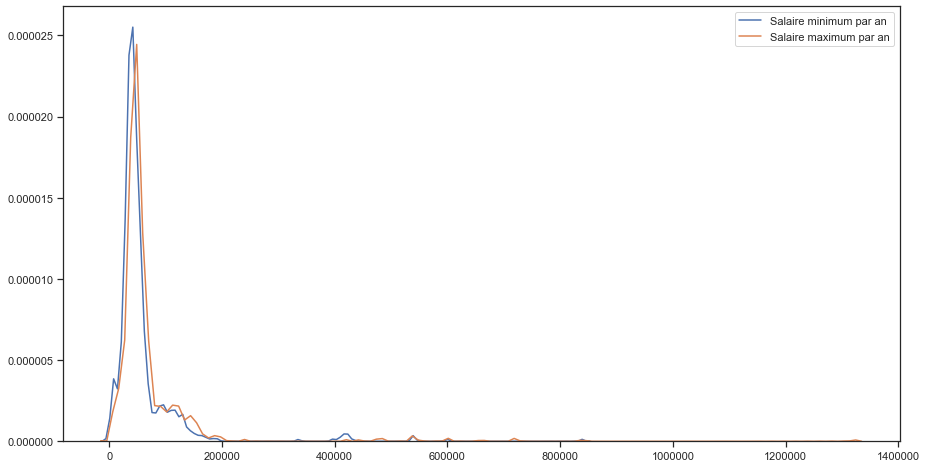

In [304]:
# Prend que des lignes dont la salaires est superireur à un certain numbre 
# df = df[df['Salaire minimum par an']>10000]

# df2 = df.sort_values('Salaire minimum par an')
import seaborn as sns

fig= plt.figure(figsize=(15,8))
# Make default density plot
p1 = sns.kdeplot(df['Salaire minimum par an'])
p2 = sns.kdeplot(df['Salaire maximum par an'])
#sns.plt.show()

In [305]:
min_salaire = pd.DataFrame(df['Salaire minimum par an'].value_counts().sort_index()/len(df))
max_salaire = pd.DataFrame(df['Salaire maximum par an'].value_counts().sort_index()/len(df))

proba_accru_min  = [min_salaire.iloc[0][0]]
proba_accru_max  = [max_salaire.iloc[0][0]]


In [306]:

for i in range(1,min_salaire.shape[0]):
    proba_accru_min.append(proba_accru_min[-1] + min_salaire.iloc[i][0])
for j in range(1,max_salaire.shape[0]):
    proba_accru_max.append(proba_accru_max[-1] + max_salaire.iloc[j][0])


No handles with labels found to put in legend.


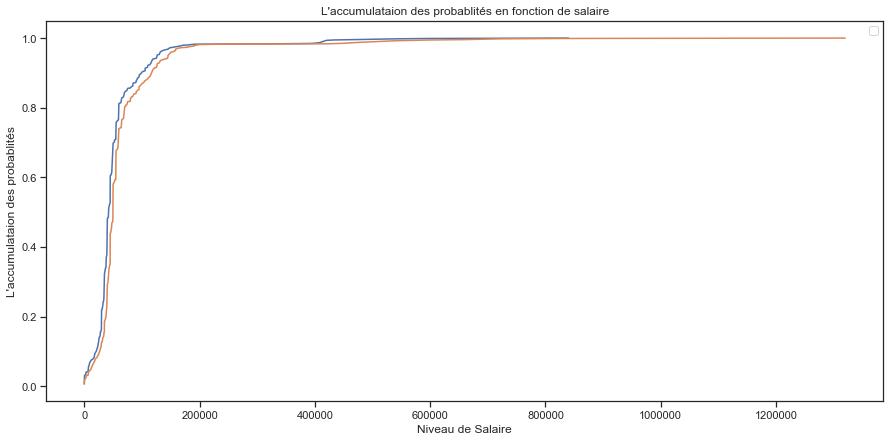

In [307]:
fig= plt.figure(figsize=(15,7))

p1 = plt.plot(min_salaire.index, proba_accru_min)
p2 = plt.plot(max_salaire.index, proba_accru_max)

plt.title('L\'accumulataion des probablités en fonction de salaire')
plt.xlabel('Niveau de Salaire')
plt.ylabel('L\'accumulataion des probablités')
plt.legend()
plt.show()


In [308]:
df['Classe de salaire par an'] = np.nan
df = df.apply(lambda row: put_class_salaire(row, separe_quantile(df,3)), axis=1)

try:
    df = df.drop(['Salaire','Salaire minimum par an', 'Salaire maximum par an', 'Entreprise', 'Description'], axis=1)
except:
    pass

In [309]:
data = pd.get_dummies(df,prefix=['Profession','Pays','Experience','Level'], columns = ['Métier','Pays','Experience required','Study required'])

In [310]:

try:
    data.drop(['Description', 'Entreprise'], axis=1, inplace=True)
except:
    pass

try:
    data.drop('Poste', axis=1, inplace=True)
except:
    pass

data.reset_index(drop=True, inplace=True)

data['City'] = data['Ville'].apply(lambda x: extract_city(x))

data = pd.get_dummies(data,prefix=['City'], columns = ['City'])
try:
    data.drop(['Ville'], axis=1, inplace=True)
except:
    pass

data = data.fillna(0)

In [311]:
data

,Data science,Data analysis programming language,R,Matlab,Kubernetes,Fortran,Ruby,Golang,Programming language,Java,...,City_OR,City_PA,City_SC,City_SD,City_TN,City_TX,City_UT,City_VA,City_WA,City_WI
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
X = data.drop('Classe de salaire par an',axis=1)
y = data['Classe de salaire par an']

# ax = sns.heatmap(data.corr())
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

models = [RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),LogisticRegression(), SVC(), KNeighborsClassifier(5),MultinomialNB(), BernoulliNB()]
models_name = ["RandomForestClassifier","DecisionTreeClassifier","LogisticRegression", "SVC", "KNeighborsClassifier",  "MultinomialNB", "BernoulliNB"]
#model = LinearRegression()

# Calcule tout les scores en parcourant de bout à bout 
# d_cross =  cross_validate(model, X_train, Y_train)

In [313]:
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    scores =  cross_val_score(models[i], X_train, y_train)
    accuracy = accuracy_score(y_test,y_pred)

    print("Model: ",models_name[i])
    print('Cross mean score: ',scores.mean())
    print('Accuracy: ', accuracy)
    print()

Model:  RandomForestClassifier
Cross mean score:  0.6429410120212469
Accuracy:  0.6502732240437158

Model:  DecisionTreeClassifier
Cross mean score:  0.5499207902339018
Accuracy:  0.5136612021857924

Model:  LogisticRegression
Cross mean score:  0.5526232410772528
Accuracy:  0.5519125683060109

Model:  SVC
Cross mean score:  0.5937470878762464
Accuracy:  0.644808743169399

Model:  KNeighborsClassifier
Cross mean score:  0.5266890317770945
Accuracy:  0.5355191256830601

Model:  MultinomialNB
Cross mean score:  0.5362128413009039
Accuracy:  0.5901639344262295

Model:  BernoulliNB
Cross mean score:  0.5389712049203242
Accuracy:  0.5846994535519126



In [314]:
# RandomForestClassifier avec GridSearchCV
param_grid = { 
    'n_estimators': [100,200,300,700],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = RandomForestClassifier() 
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring='accuracy')
grid.fit(X_train,y_train)

print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[30 15  7]
 [10 42 12]
 [ 2 18 47]]
                 precision    recall  f1-score   support

      0 - 40000       0.71      0.58      0.64        52
  40000 - 52500       0.56      0.66      0.60        64
52500 - 1320000       0.71      0.70      0.71        67

       accuracy                           0.65       183
      macro avg       0.66      0.64      0.65       183
   weighted avg       0.66      0.65      0.65       183



In [315]:
# Decision Tree avec Grid search CV 
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid.fit(X_train, y_train)

print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 3 folds for each of 294 candidates, totalling 882 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=88,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
[[23 16 13]
 [12 38 14]
 [ 8 19 40]]
                 precision    recall  f1-score   support

      0 - 40000       0.53      0.44      0.48        52
  40000 - 52500       0.52      0.59      0.55        64
52500 - 1320000       0.60      0.60      0.60        67

       accuracy                           0.55       183
      macro avg       0.55      0.54      0.55       183
   weighted avg       0.55      0.55      0.55      

In [316]:
# SVC avec Grid search CV 
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

....
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[

In [317]:
# LogisticRegression avec GridSearchCV

model = LogisticRegression()
params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(estimator = model, param_grid=params)

grid.fit(X_train,y_train)

print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[25 16 11]
 [13 35 16]
 [ 7 12 48]]
                 precision    recall  f1-score   support

      0 - 40000       0.56      0.48      0.52        52
  40000 - 52500       0.56      0.55      0.55        64
52500 - 1320000       0.64      0.72      0.68        67

       accuracy                           0.59       183
      macro avg       0.58      0.58      0.58       183
   weighted avg       0.59      0.59      0.59       183



In [318]:
# KNeighborsClassifier avec Grid search CV 

k_range = list(range(1,15))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
[[27 19  6]
 [13 40 11]
 [ 7 20 40]]
                 precision    recall  f1-score   support

      0 - 40000       0.57      0.52      0.55        52
  40000 - 52500       0.51      0.62      0.56        64
52500 - 1320000       0.70      0.60      0.65        67

       accuracy                           0.58       183
      macro avg       0.59      0.58      0.58       183
   weighted avg       0.60      0.58      0.59       183



In [319]:
data['Classe de salaire par an'].unique()

array(['0 - 40000', '52500 - 1320000', '40000 - 52500'], dtype=object)